In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

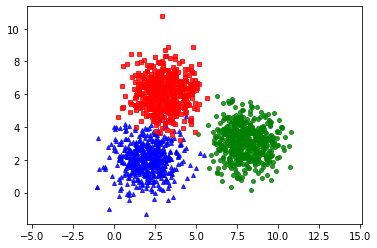

In [13]:
means = [[2,2], [8,3], [3,6]]
cov =[[1,0], [0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label==0, :]
    X1 = X[label==1, :]
    X2 = X[label==2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [19]:
def kmean_init_center(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assgin_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, label, K):
    centers = np.zeros((K, X.shape[1]))
    for i in range(K):
        Xk = X[label == i, :]
        centers[i,:] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))


In [20]:
def kmeans(X, K):
    centers = [kmean_init_center(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assgin_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm: 
[[3.06047309 6.07366595]
 [8.03195207 3.07795748]
 [2.00314952 2.0258537 ]]


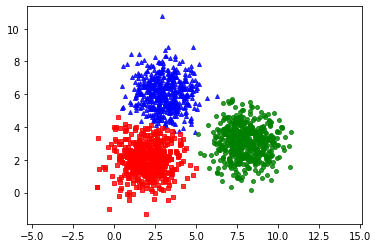

In [21]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm: ')
print(centers[-1])

kmeans_display(X ,labels[-1])

Result was founded by sklearn library

Centers found by scikit-learn:
[[8.03195207 3.07795748]
 [3.05470427 6.06654008]
 [2.00475121 2.01675433]]


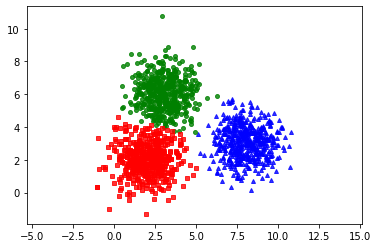

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)